In [4]:
#import packages
import torch 
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load and print data
data = pd.read_csv('Project/measures_v2.csv')
data.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


In [6]:
#no need to standardize data, std nearly 1, mean nearly 0
data.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [7]:
#no missing values
print(data.shape)
data.info()

(1330816, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


/var/folders/pw/k0g91zhn21g3f42z088gvkp80000gn/T/ipykernel_62535/1065957264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="profile_id", kind="count", data=data, height=9, aspect=16/9, palette=sns.color_palette(['blue']))
/var/folders/pw/k0g91zhn21g3f42z088gvkp80000gn/T/ipykernel_62535/1065957264.py:2: UserWarning: 
The palette list has fewer values (1) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="profile_id", kind="count", data=data, height=9, aspect=16/9, palette=sns.color_palette(['blue']))


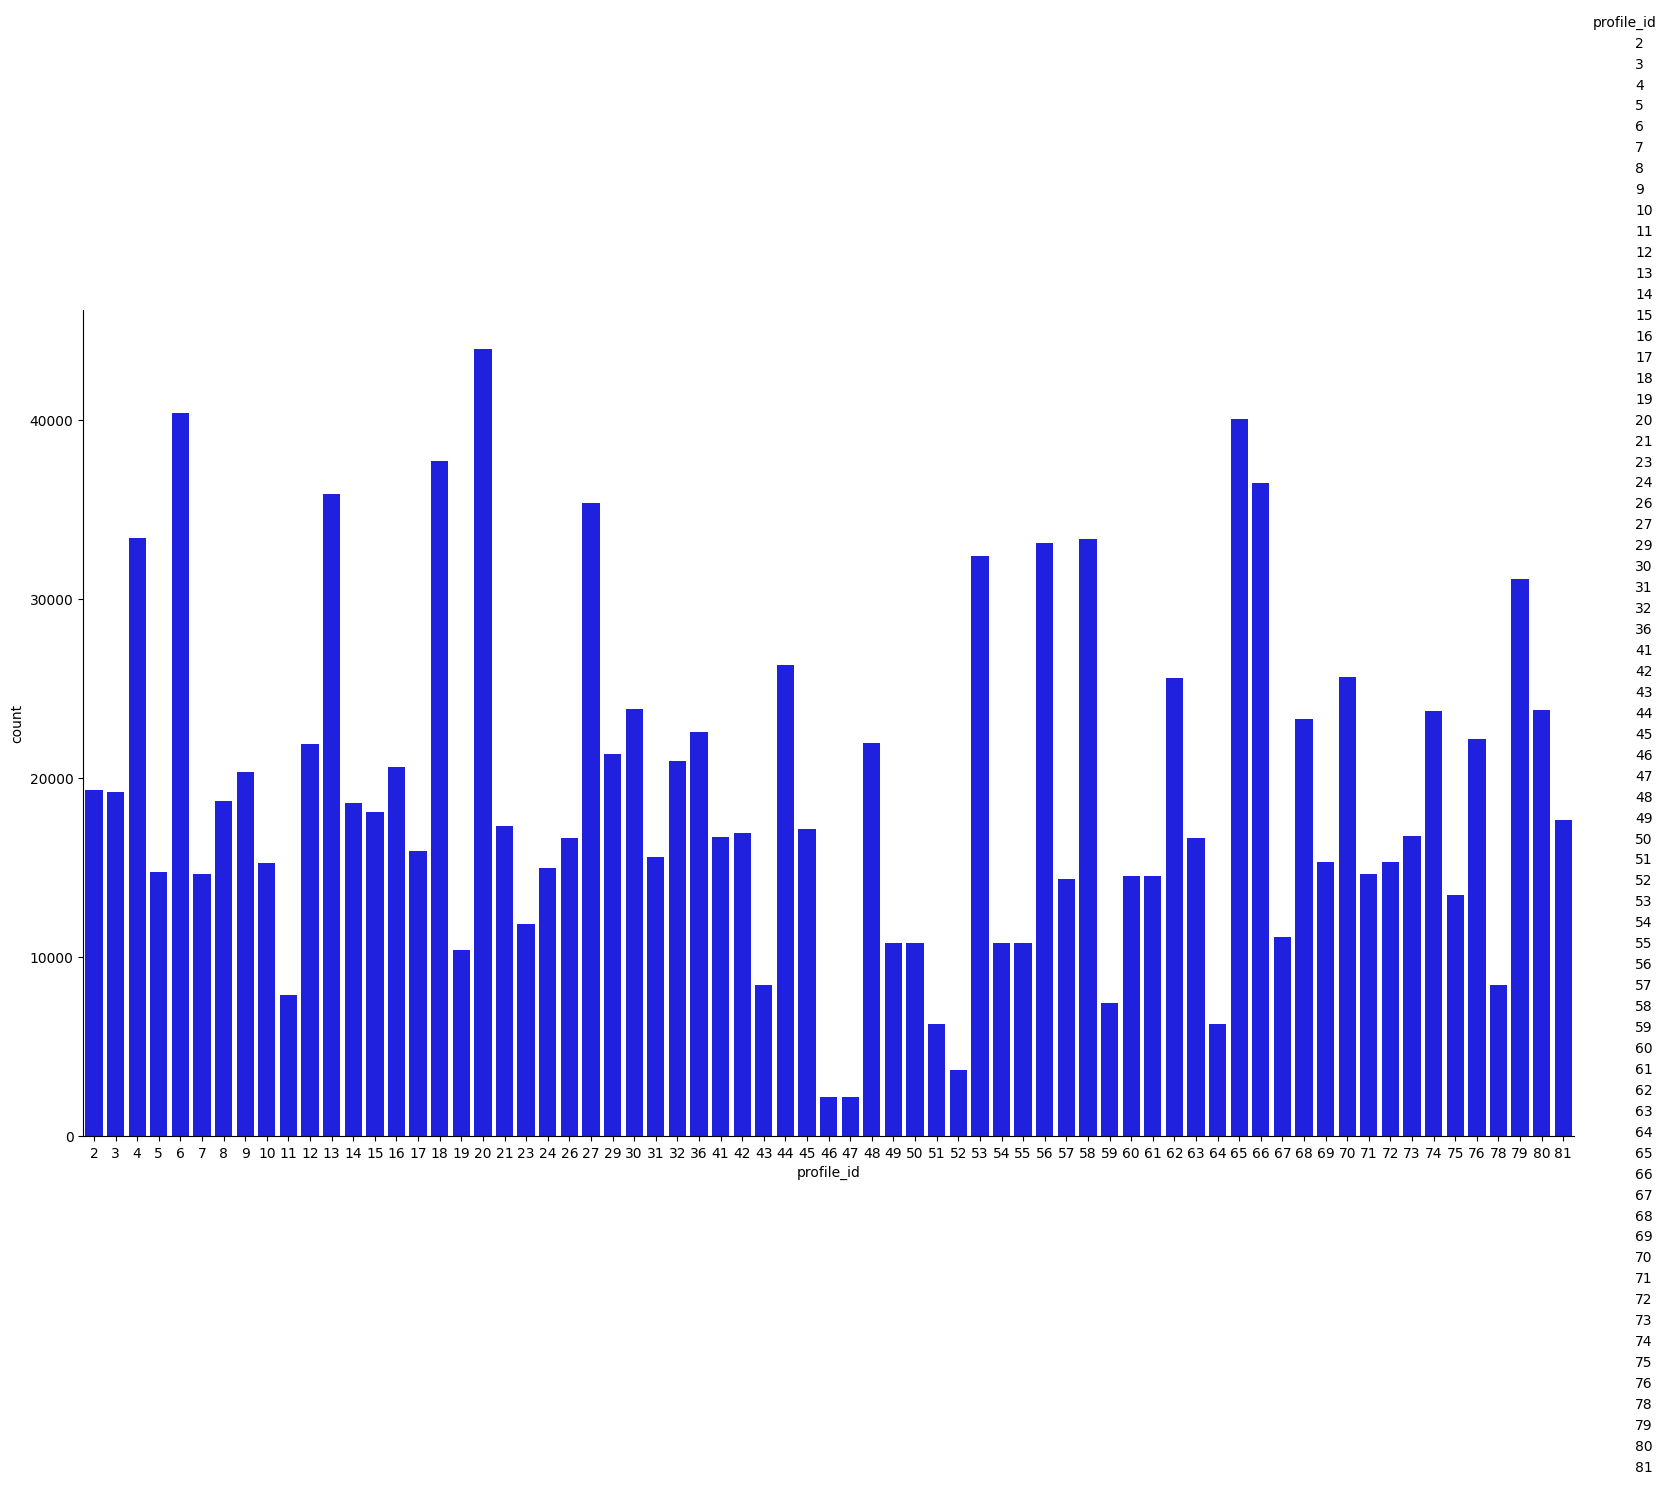

In [8]:
#overview about sessions and length
sns.catplot(x="profile_id", kind="count", data=data, height=9, aspect=16/9, palette=sns.color_palette(['blue']))
plt.show()

In [9]:
#function to trim sessions to an appropriate size
def preprocess(sessions_id, seq_len, target="torque"):
    sessions = []
    for id in sessions_id:
        s = data[data["profile_id"] == id]
        r = len(s) % seq_len
        l = len(s) - r
        
        session = s.iloc[:l]
        
        y = session[target]
        X = session.drop([target, "profile_id"], axis=1)
        
        X = torch.from_numpy(X.values).float() 
        y = torch.from_numpy(y.values).float()

        sessions.append((X, y))
        
    return sessions

In [10]:
#Bidirectional LSTM class
class NET(nn.Module):
    def __init__(self, in_size, h_size, n_layers, out_size):
        super(NET, self).__init__()
        self.h_size = h_size
        self.n_layers = n_layers
        self.out_size = out_size
        self.lstm = nn.LSTM(in_size, h_size, n_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(h_size * 2, out_size)
             
    def forward(self, x):
        #init. states 
        h0 = torch.zeros(self.n_layers * 2, x.size(0), self.h_size)
        c0 = torch.zeros(self.n_layers * 2, x.size(0), self.h_size)
        
        out, _ = self.lstm(x, (h0, c0)) 
        out = self.fc(out)
        return out 

In [13]:
#defining the sequence length and the sessions ids which are used for training
seq_len = 100
ids = [4, 6, 10, 11, 20, 27, 29, 30, 31,32, 36] + [i+41 for i in range(35)]

#trim sessions
sessions = preprocess(ids, seq_len)
print(sessions)

#create an lstm instance
model = NET(11, 20, 2, 1)
print(model)

#define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

[(tensor([[-0.8763, 17.5589, 18.6368,  ..., 22.9591, 18.2011, 23.6467],
        [-0.8689, 17.5907, 18.6473,  ..., 22.9536, 18.2098, 23.6104],
        [-1.0480, 17.5983, 18.6549,  ..., 22.9495, 18.2209, 23.5883],
        ...,
        [24.6496, 18.1989, 19.8730,  ..., 30.8130, 19.8337, 25.6098],
        [24.6532, 18.2100, 19.8666,  ..., 30.8296, 19.8304, 25.6037],
        [24.6536, 18.2322, 19.8930,  ..., 30.8441, 19.8326, 25.5810]]), tensor([ 0.4353,  0.5189,  0.4952,  ..., -0.0322, -0.0259, -0.0246])), (tensor([[ 1.9500, 17.2159, 19.1057,  ..., 24.3597, 18.2106, 23.1928],
        [ 2.0501, 17.2301, 19.0925,  ..., 24.3560, 18.2245, 23.2165],
        [ 2.1196, 17.2388, 19.0767,  ..., 24.3560, 18.2204, 23.2327],
        ...,
        [25.0217, 18.5804, 27.9510,  ..., 48.4245, 23.2822, 25.8951],
        [25.0225, 18.5984, 27.9562,  ..., 48.4298, 23.2838, 25.8512],
        [25.0229, 18.6211, 27.9443,  ..., 48.4368, 23.2926, 25.7998]]), tensor([41.4809, 43.1166, 44.2084,  ..., 51.6559, 51.659

In [12]:
n_epochs = 30

#train model
train_losses = []

model.train()
for e in range(n_epochs):
    for X, y in sessions:
        optimizer.zero_grad()
        out = model.forward(X.view(-1, seq_len, 11))
        loss = criterion(out, y.view(-1, seq_len, 1))
        
        loss.backward()
        optimizer.step()
        train_losses.append(loss.detach().numpy())
    
#print training error
plt.rcParams["figure.figsize"] = [16, 9]
plt.plot(train_losses, 'b', label='Training Error')
plt.legend(loc='upper right')
plt.ylabel('Error')
plt.show()

KeyboardInterrupt: 

Loss: 0.0005445976


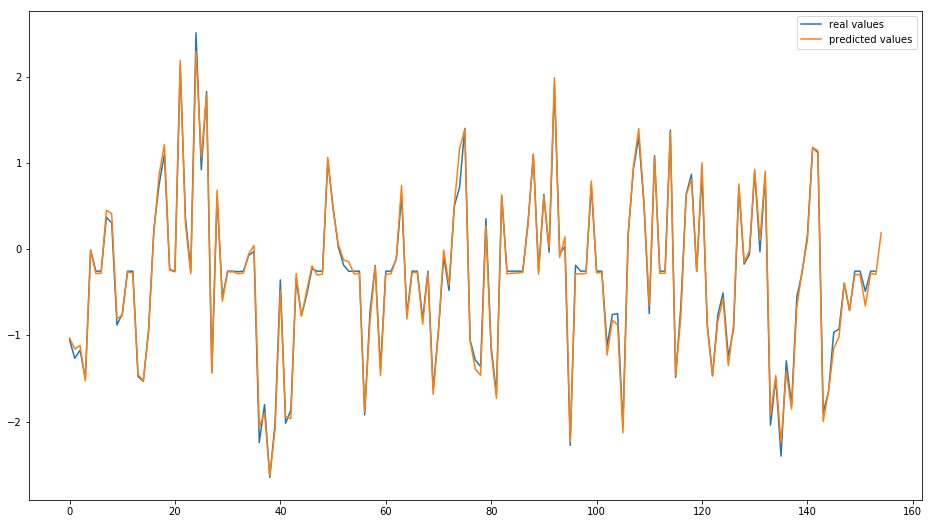

In [ ]:
model.eval()

#evaluation on session 80 and 81
session_80 = data[data["profile_id"] == 80]
session_80 = session_80.iloc[:15500]

y = session_80["torque"]
X = session_80.drop(["torque", "profile_id"], axis=1)

X_80 = torch.from_numpy(X.values[:22000, :]).float() 
y_80 = torch.from_numpy(y.values[:22000]).float()

out = model.forward(X_80.view(-1, seq_len, 11))
loss = criterion(out, y_80.view(-1, seq_len, 1))
print("Loss: " + str(loss.detach().numpy()))

out = out[:, -1, :]
pred = out.detach().numpy().flatten()
real = y_80.numpy()[seq_len::seq_len]

plt.plot(real.flatten(), label="real values")
plt.plot(pred, label="predicted values")
plt.legend(loc='upper right')
plt.show()

Loss: 0.00035990696


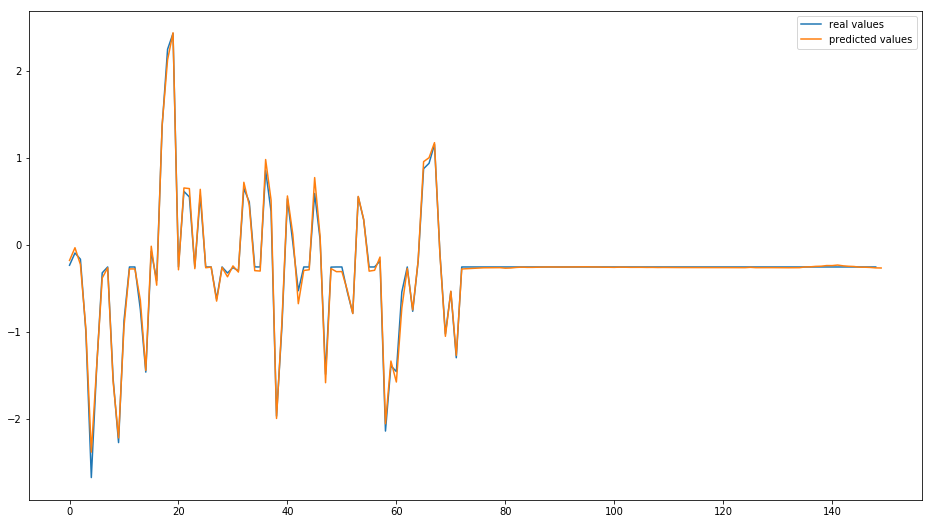

In [ ]:
#evaluation on session 81
session_81 = data[data["profile_id"] == 81]
session_81 = session_81.iloc[:15000]

y = session_81["torque"]
X = session_81.drop(["torque", "profile_id"], axis=1)

X_81 = torch.from_numpy(X.values[:15000, :]).float() 
y_81 = torch.from_numpy(y.values[:15000]).float()

out = model.forward(X_81.view(-1, seq_len, 11))
loss = criterion(out, y_81.view(-1, seq_len, 1))
print("Loss: " + str(loss.detach().numpy()))

out = out[:, -1, :]
pred = out.detach().numpy().flatten()
real = y_81.numpy()[seq_len::seq_len]

plt.plot(real.flatten(), label="real values")
plt.plot(pred, label="predicted values")
plt.legend(loc='upper right')
plt.show()